In [1]:
import numpy as mp
import pandas as pd

In [2]:
da=pd.read_csv("fruitdata.csv")

In [3]:
da.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
da .describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [5]:
da.fruit_label.value_counts()

3    19
1    19
4    16
2     5
Name: fruit_label, dtype: int64

In [6]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B525AB0>,
      dtype=object)

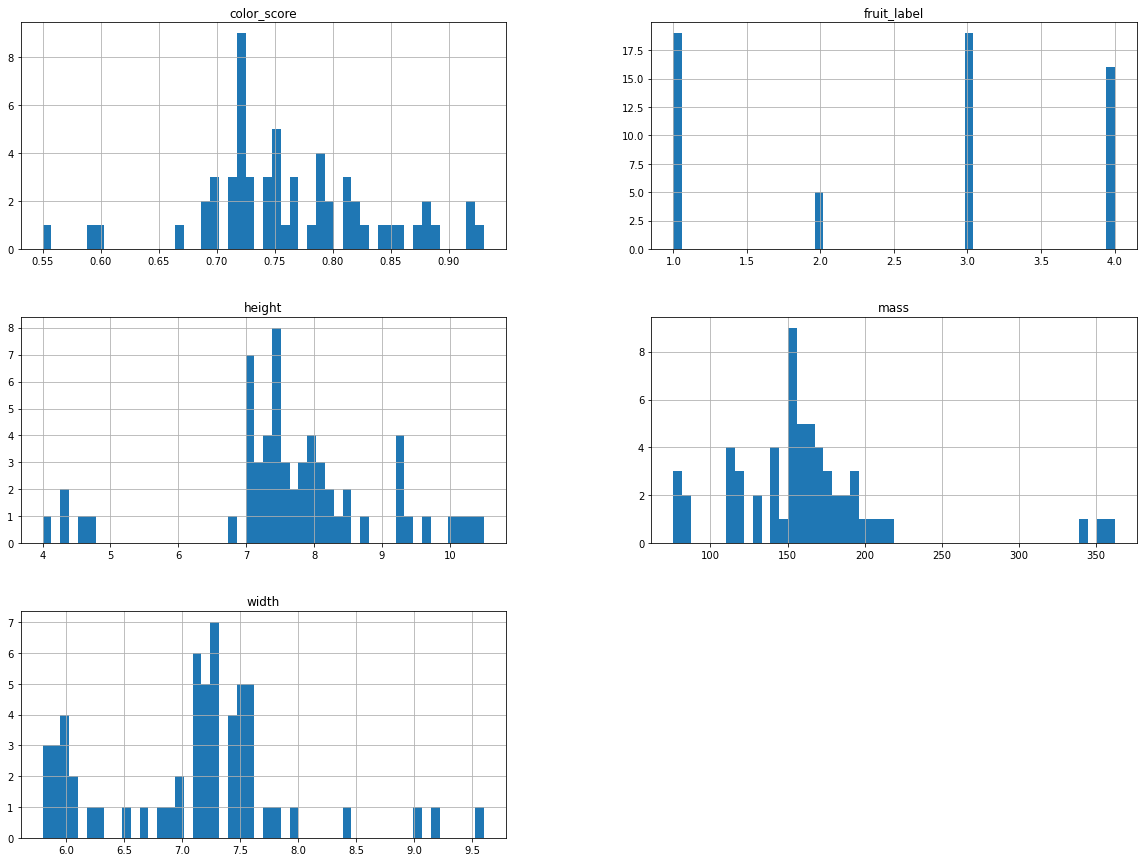

In [7]:
import matplotlib.pyplot as plt
da.hist(bins=50,figsize=(20,15))


In [8]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ KB


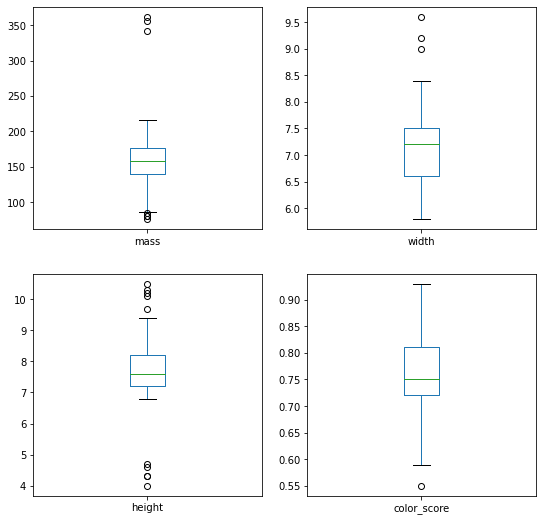

In [9]:
x=da.drop('fruit_label', axis=1)
x.plot(kind='box', subplots=True, layout=(2,2),  figsize=(9,9))
plt.show()

In [10]:
corr_matrix=da.corr()
corr_matrix['fruit_label'].sort_values(ascending=False)

fruit_label    1.000000
height         0.508766
mass           0.032738
width         -0.298090
color_score   -0.310521
Name: fruit_label, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C8DAEF0>,
      dtype=object)

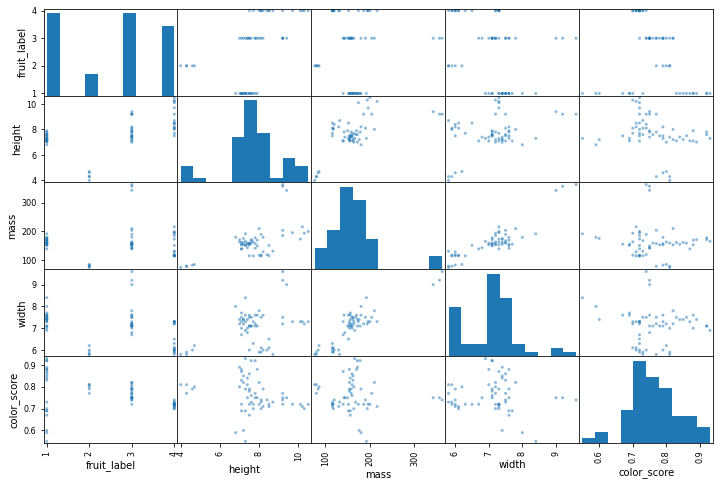

In [11]:
from pandas.plotting import scatter_matrix
features=['fruit_label','height','mass','width','color_score']
scatter_matrix(da[features],figsize=(12,8))

In [20]:
X=da[features]
X.head()

,fruit_label,height,mass,width,color_score
0,1,7.3,192,8.4,0.55
1,1,6.8,180,8.0,0.59
2,1,7.2,176,7.4,0.60
3,2,4.7,86,6.2,0.80
4,2,4.6,84,6.0,0.79


In [21]:
Y=da['fruit_label'].copy()
Y.describe()


count    59.000000
mean      2.542373
std       1.208048
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: fruit_label, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)
X_train.head()


,fruit_label,height,mass,width,color_score
17,1,7.6,168,7.5,0.73
6,2,4.3,80,5.9,0.81
4,2,4.6,84,6.0,0.79
54,4,8.5,116,6.1,0.71
19,1,7.2,162,7.4,0.85


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [27]:
da_num=my_pipeline.fit_transform(X_train)
da_num=my_pipeline.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()